In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import scattertext as st
import spacy
from IPython.display import HTML


import spacy
from gensim.models import word2vec
from scattertext import SampleCorpora, word_similarity_explorer_gensim, Word2VecFromParsedCorpus
from scattertext.CorpusFromParsedDocuments import CorpusFromParsedDocuments

In [3]:
dataset = pd.read_json("dataset.json")

In [4]:
dataset.head()

,body,label,subject
0,"hello , offer fantastic 100 % free access most...",SPAM,Subject: re : free !\n
1,* * * * * * * * * * * * * * * * * * * * * * * ...,SPAM,Subject: bulk email profit\n
2,"stock invest interest , please carefully revie...",SPAM,Subject: possible + 900 % stock investment ret...
3,"syntax project innovationskolleg "" formal mode...",NOT_SPAM,Subject: minus workshop split constituent\n
4,multidisciplinary periodical : call comment * ...,NOT_SPAM,Subject: multidisciplinary periodical : call c...


In [5]:
dataset.shape


(702, 3)

In [6]:
dataset.isnull().any()

body       False
label      False
subject    False
dtype: bool

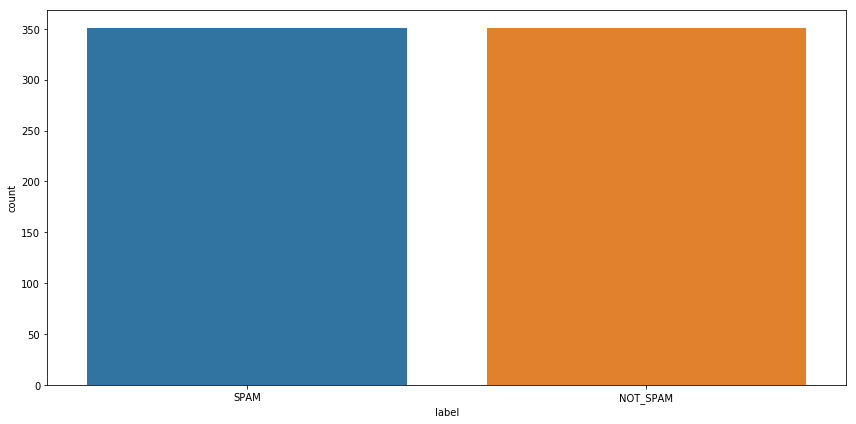

In [45]:
fig, axs = plt.subplots(ncols=1, figsize=(12,6))
g = sns.countplot(dataset["label"])
plt.tight_layout()
plt.show();

In [46]:
nlp = spacy.en.English()
corpus = st.CorpusFromPandas(dataset, category_col='label',  text_col='body',nlp=nlp).build()

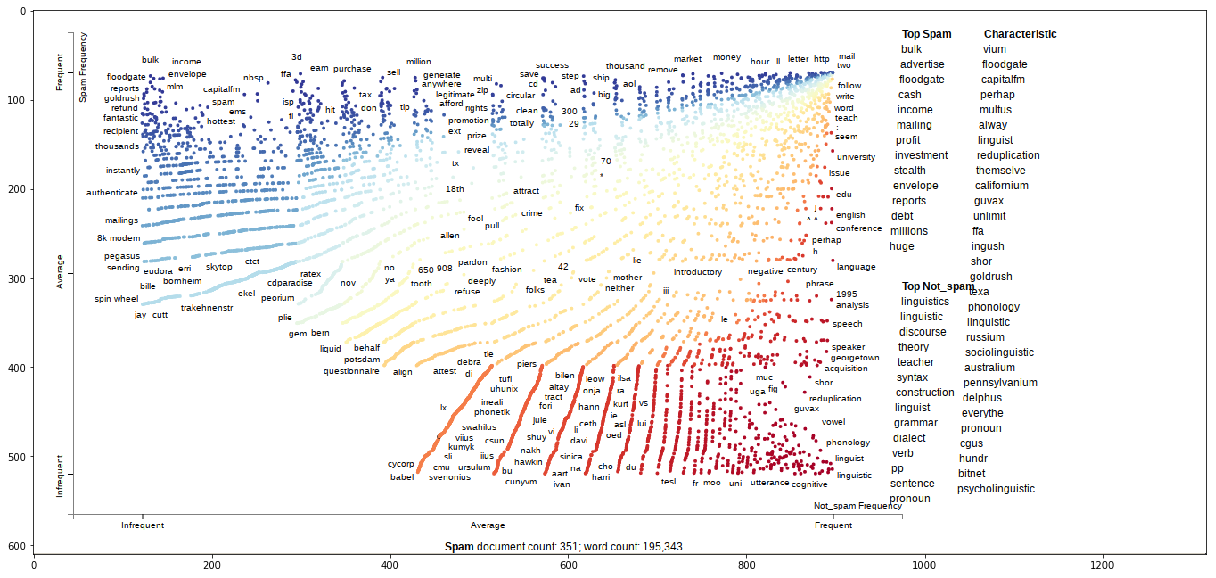

In [53]:
html = st.produce_scattertext_explorer(corpus, category='SPAM',category_name='SPAM',not_category_name='NOT_SPAM',width_in_pixels=1000)
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'));

#Notebook server crash while loading the html file. So render the html file into broswer and upload the snapshot
#visualization purpose only.
img = mpimg.imread('Convention-Visualization.png')
matplot.rcParams['figure.figsize'] = (30.0, 10.0)
plt.imshow(img)
plt.show()

In [37]:
dataset_spam = dataset.loc[dataset.label == 'SPAM',['body']]
dataset_not_spam = dataset.loc[dataset.label == 'NOT_SPAM',['body']]

In [38]:
dataset_spam.head()

,body
0,"hello , offer fantastic 100 % free access most..."
1,* * * * * * * * * * * * * * * * * * * * * * * ...
2,"stock invest interest , please carefully revie..."
5,locate anyone anywhere usa * * * * * * * old f...
6,"hope n't object complete stranger mail , belie..."


In [39]:
dataset_not_spam.head()

,body
3,"syntax project innovationskolleg "" formal mode..."
4,multidisciplinary periodical : call comment * ...
7,"inform untimely death jochem schindler , prof ..."
9,"week ago , post query language moo site . rece..."
10,"cycorp seek enthusiastic , highly-motivate mul..."


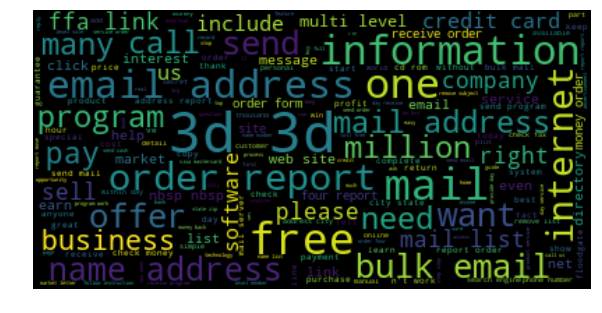

In [57]:
wordcloud_spam = WordCloud(max_font_size=40).generate(' '.join(list(dataset_spam['body'])))
plt.figure()
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.show()

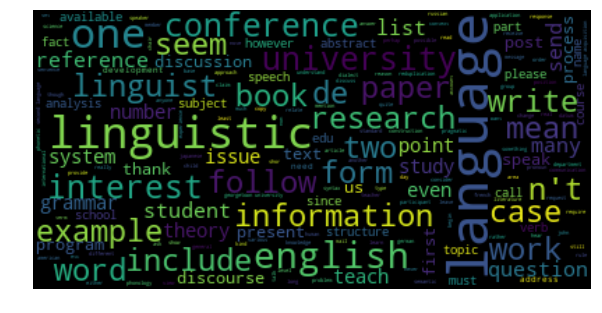

In [58]:
wordcloud_not_spam = WordCloud(max_font_size=40).generate(' '.join(list(dataset_not_spam['body'])))
plt.figure()
plt.imshow(wordcloud_not_spam, interpolation="bilinear")
plt.axis("off")
plt.show()